In [2]:
import numpy as np
import pandas as pd
import keras
import tensorflow as tf

Using TensorFlow backend.


## Load dataset for EDA

In [3]:
df = pd.read_csv("./data/climate_hour.csv")
print(df.shape)
display(df.head(5))

(70037, 15)


,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 01:00:00,996.50,-8.05,265.38,-8.78,94.4,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
1,01.01.2009 02:00:00,996.62,-8.88,264.54,-9.77,93.2,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
2,01.01.2009 03:00:00,996.84,-8.81,264.59,-9.66,93.5,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
3,01.01.2009 04:00:00,996.99,-9.05,264.34,-10.02,92.6,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
4,01.01.2009 05:00:00,997.46,-9.63,263.72,-10.65,92.2,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0


In [4]:
edaDf=df.copy()
date_time=list(pd.to_datetime(list(map(lambda x:x.replace("_"," "), edaDf["Date Time"]))))
edaDf["Date Time"] = date_time 
edaDf.set_index("Date Time", inplace=True)

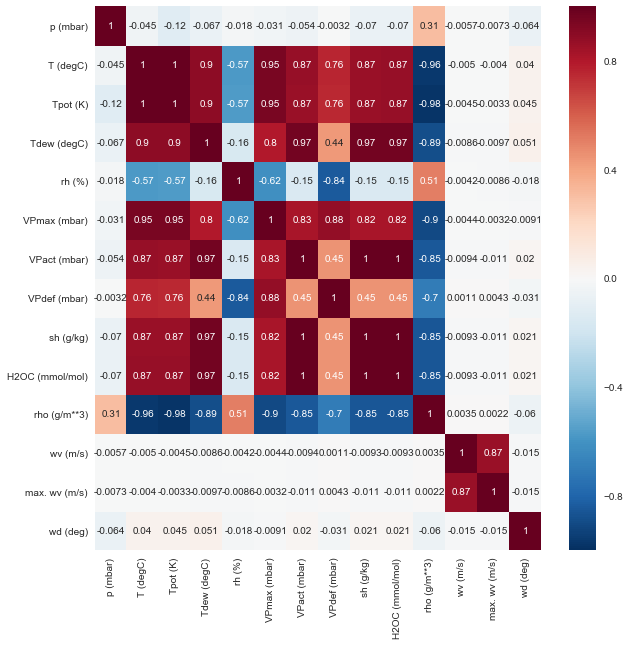

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10,10))
ax=sns.heatmap(edaDf.corr(), annot=True)

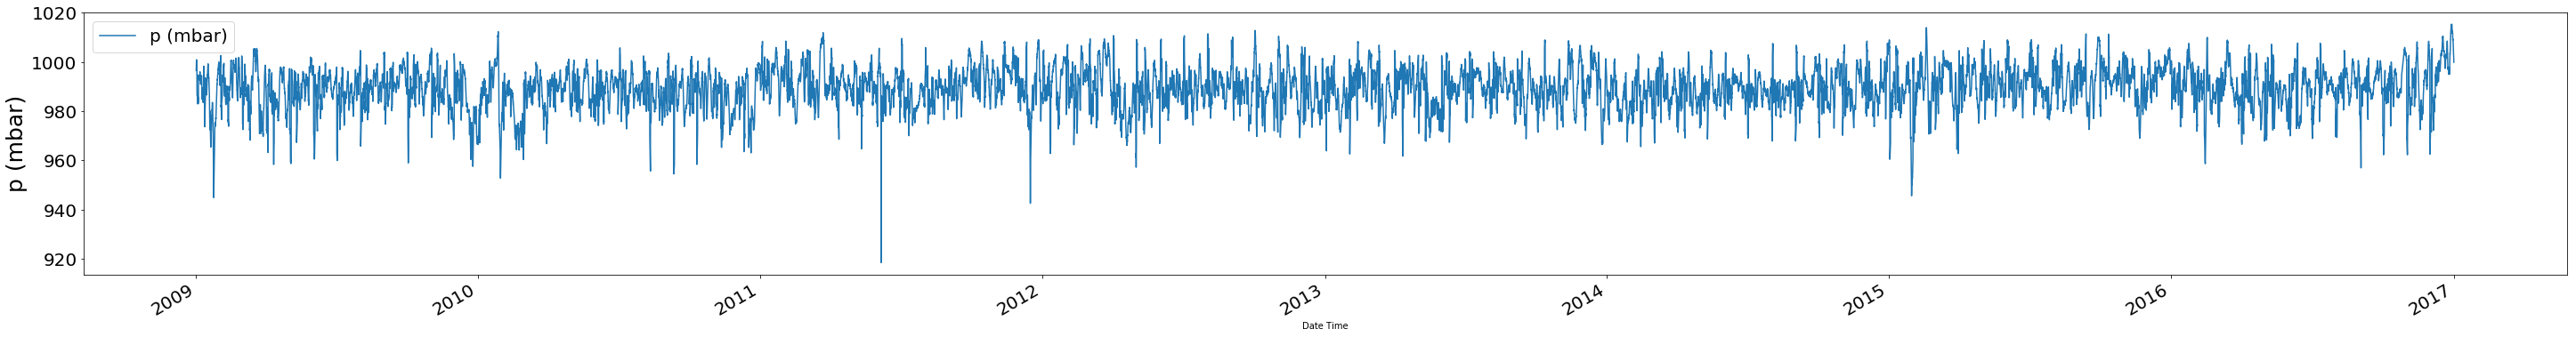

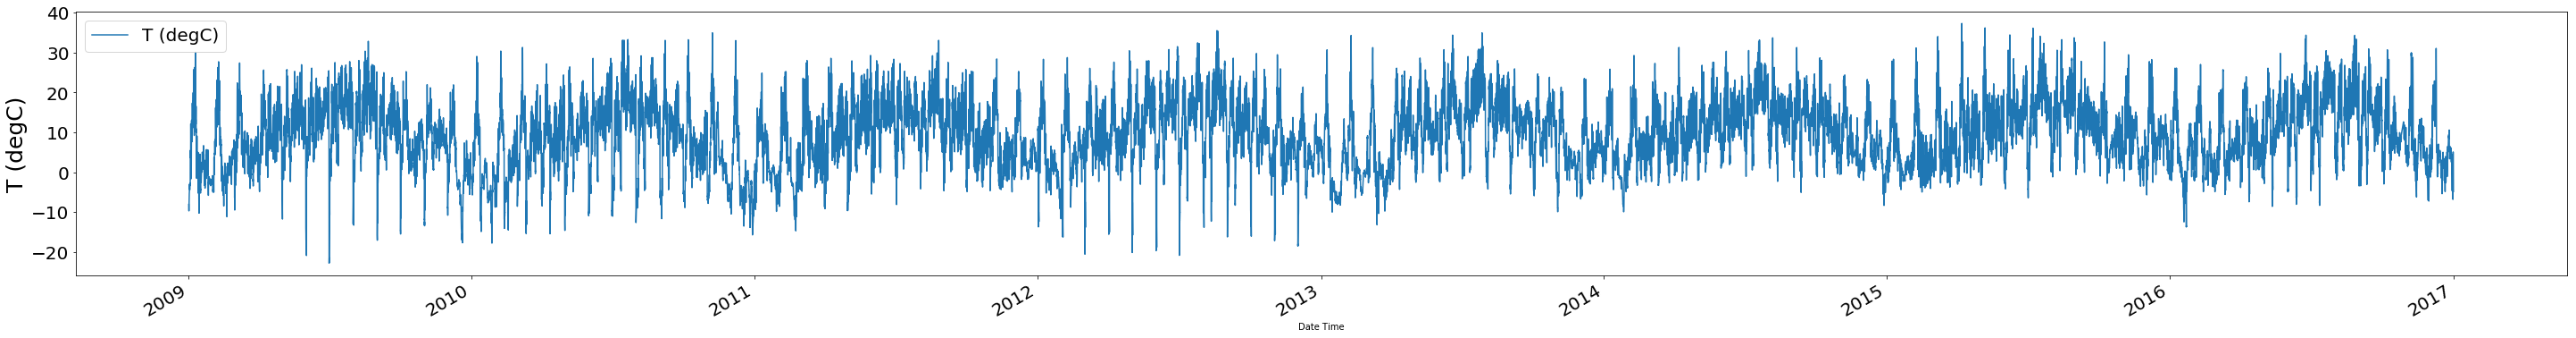

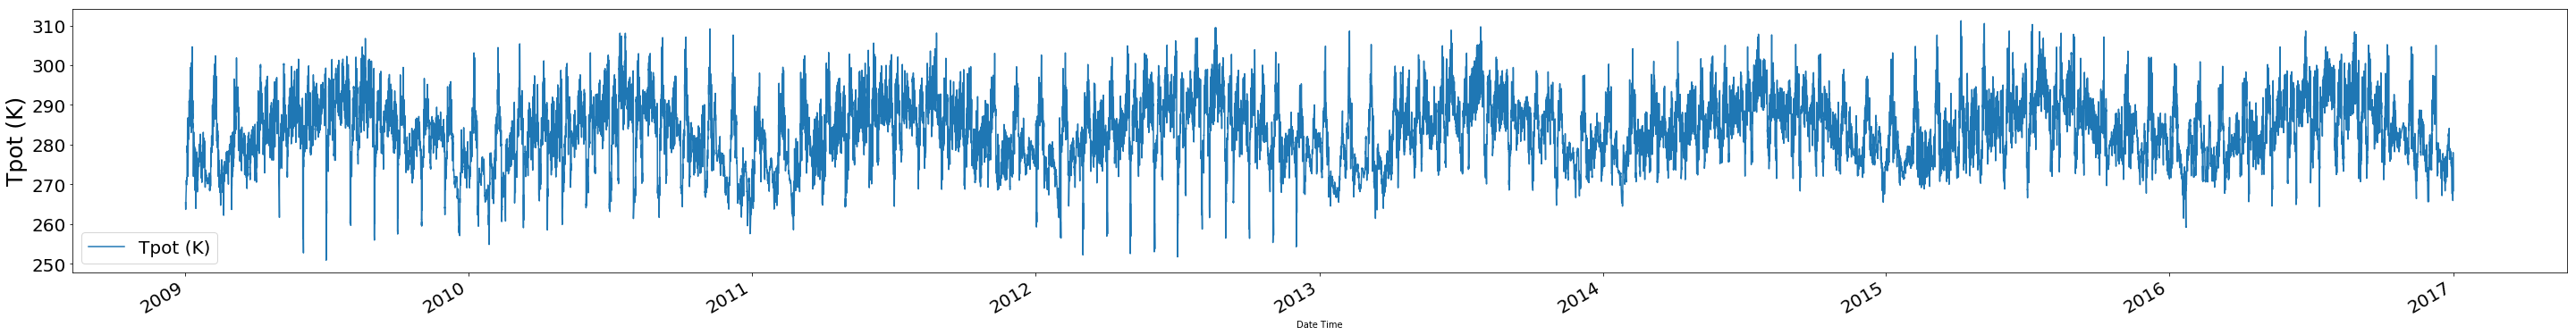

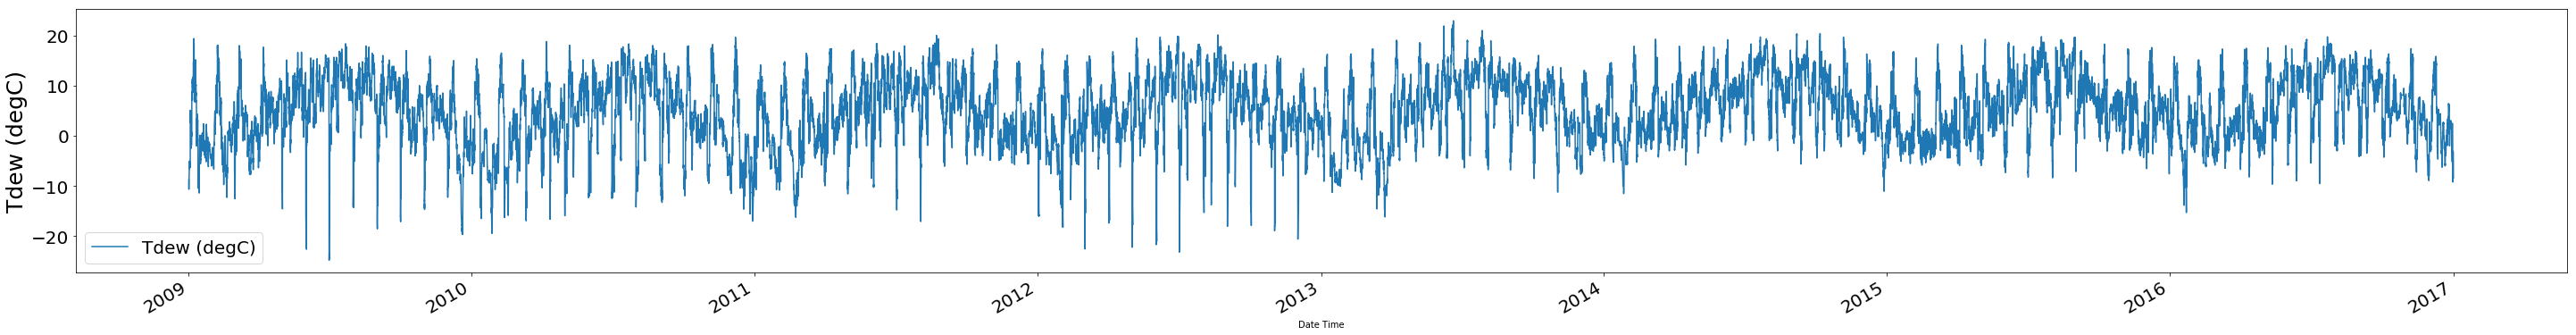

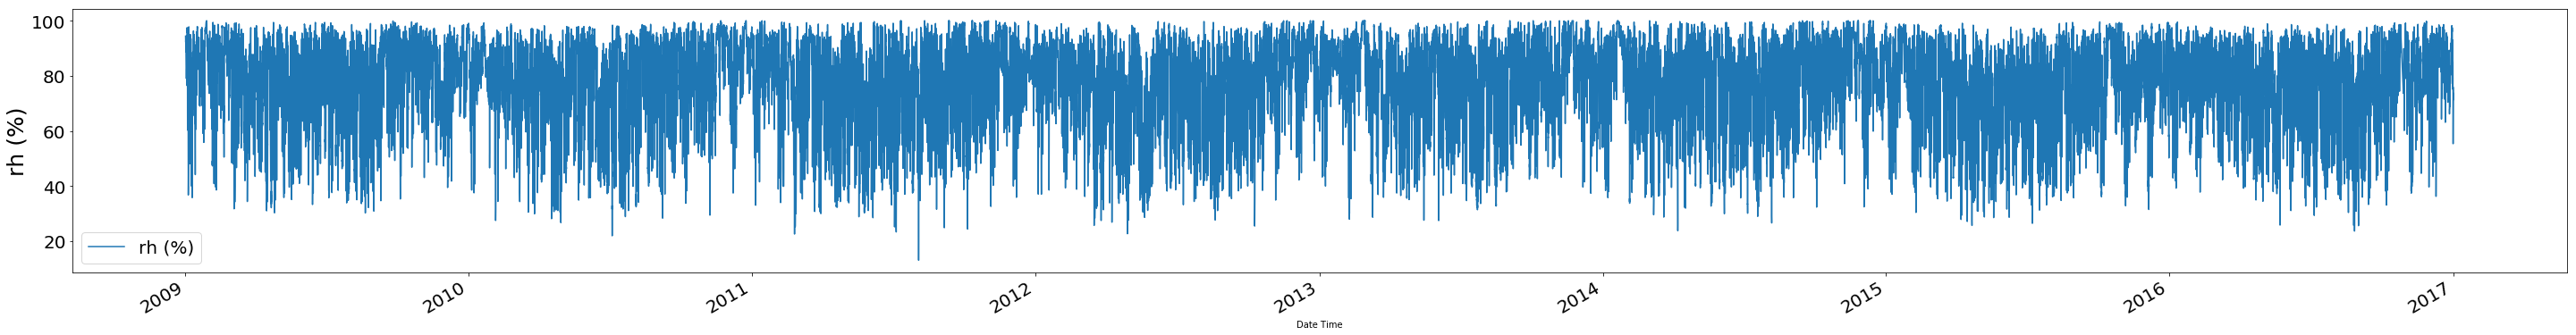

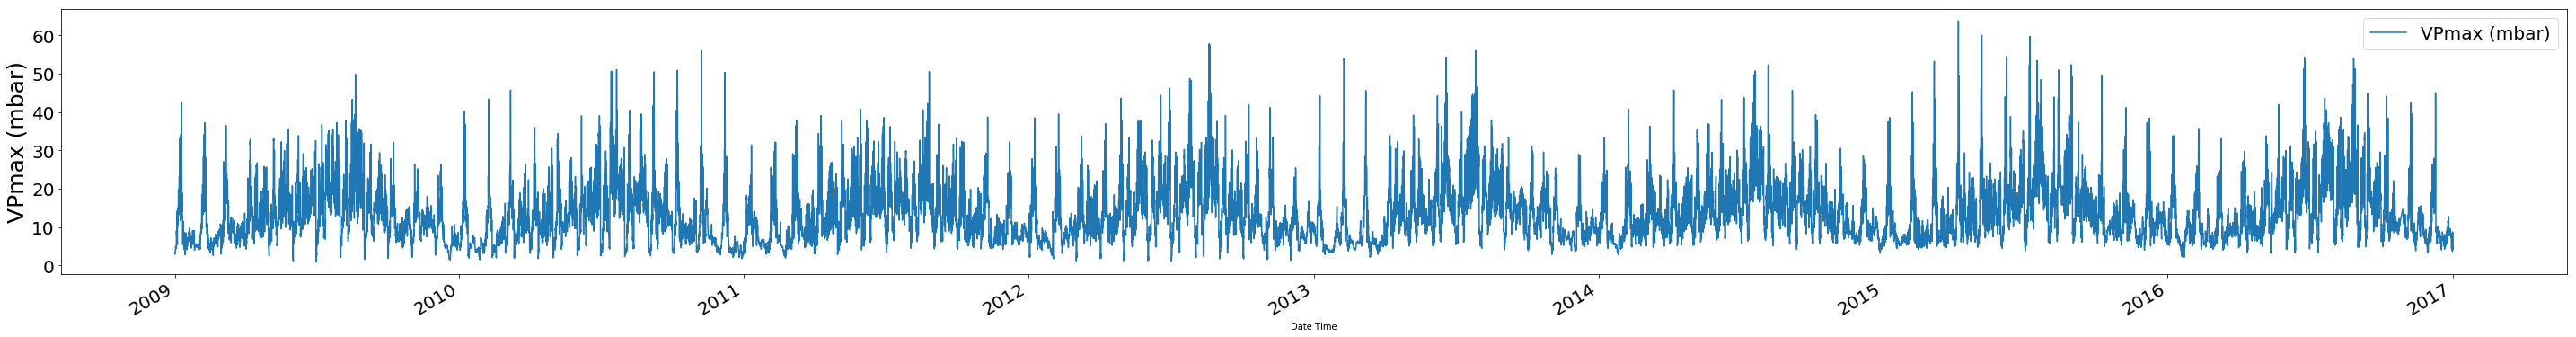

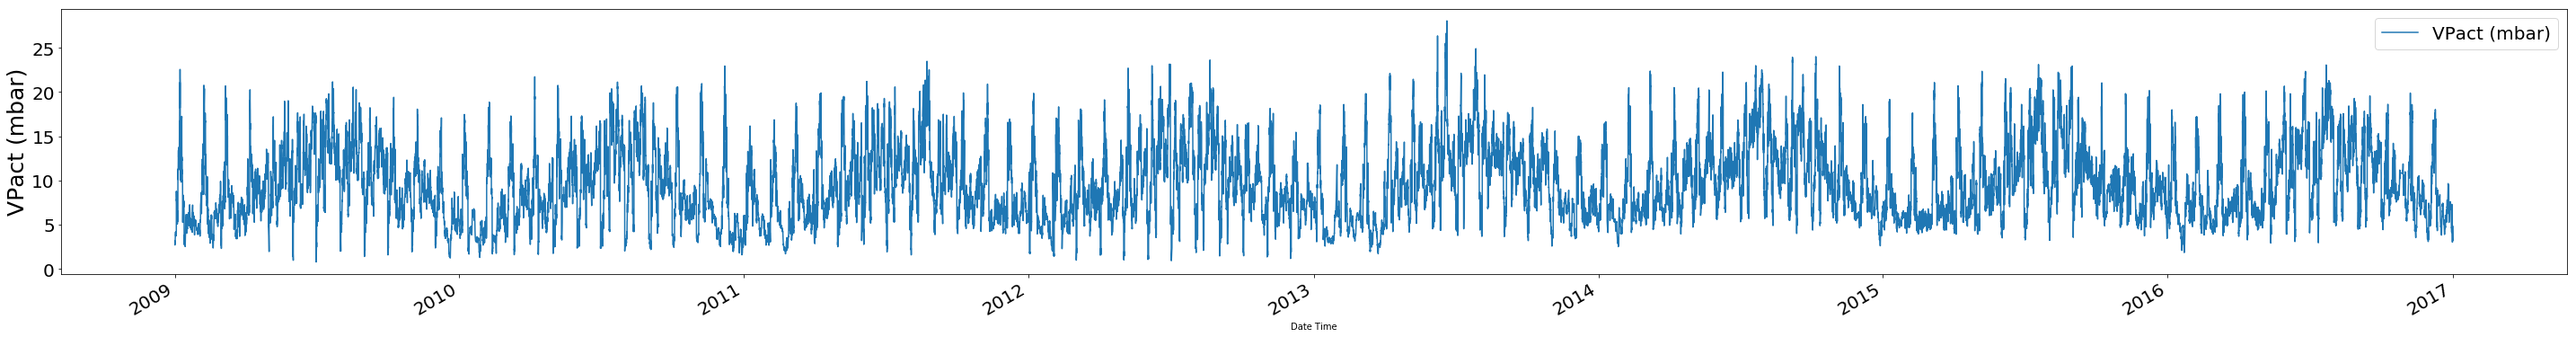

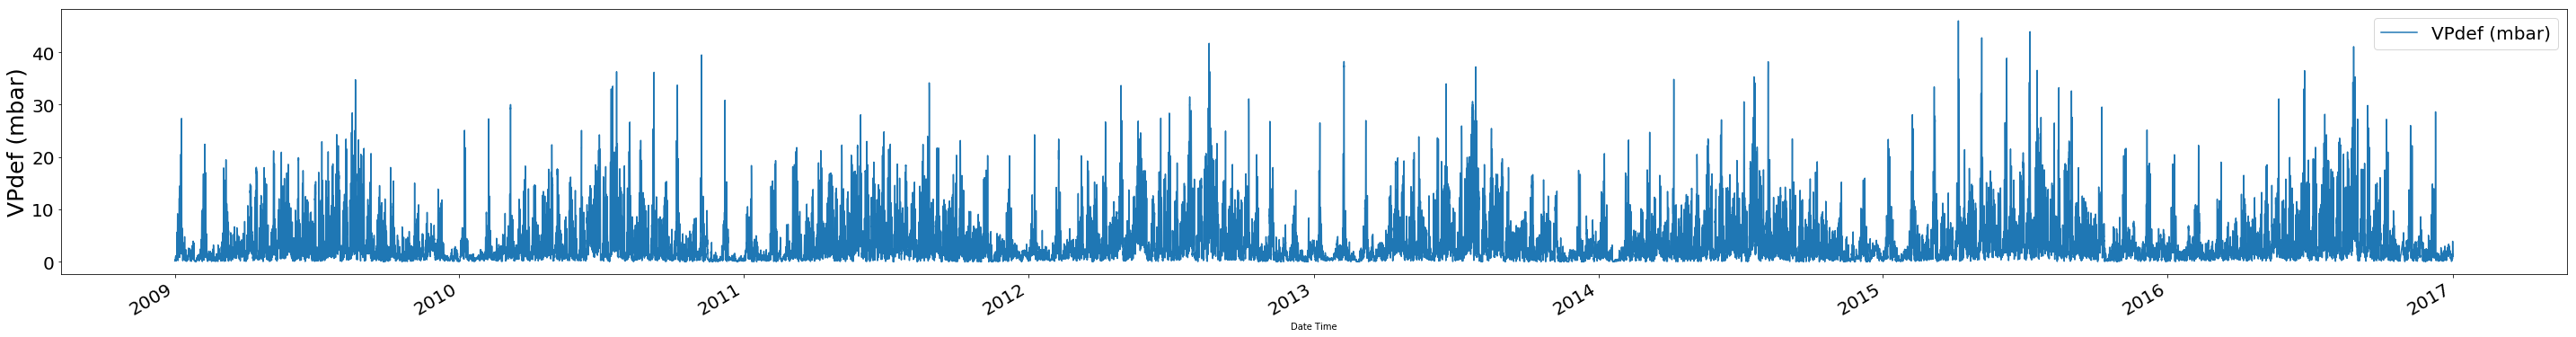

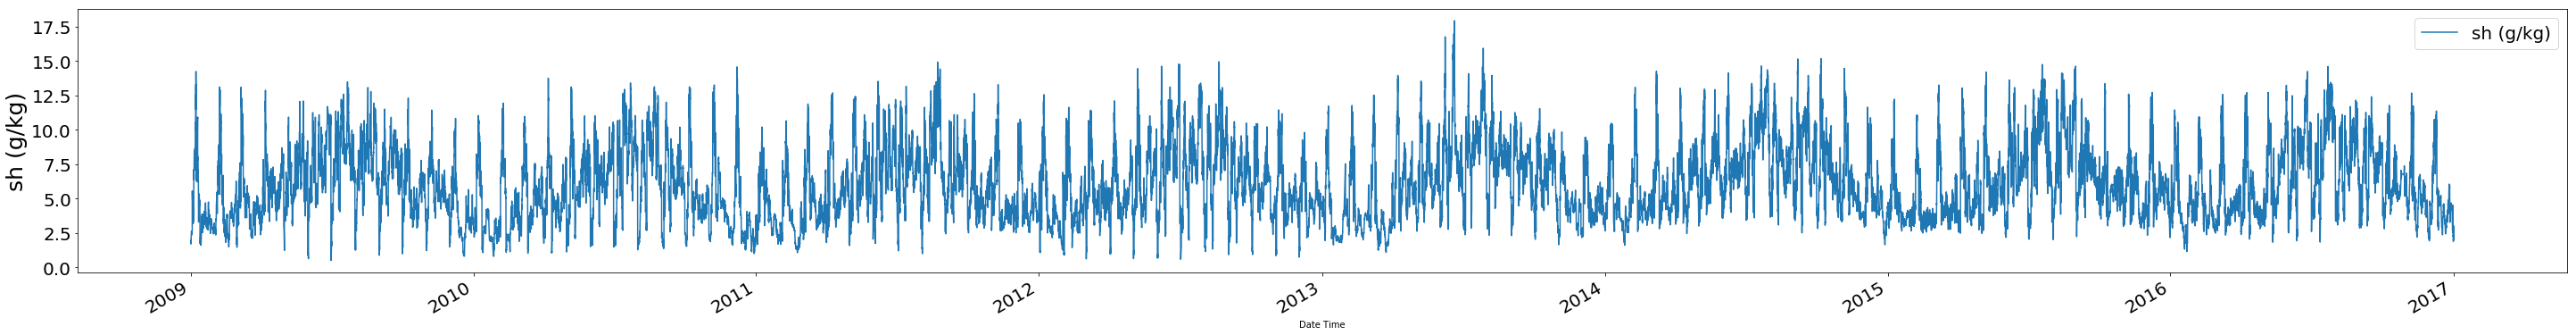

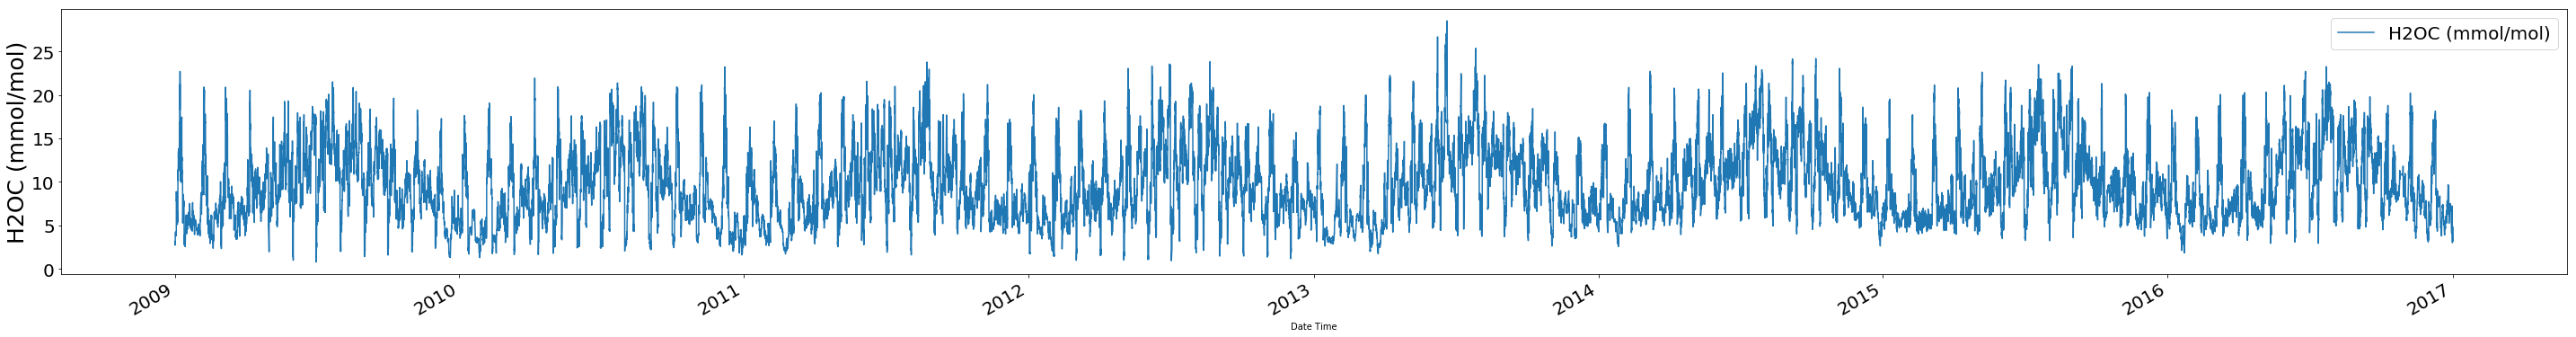

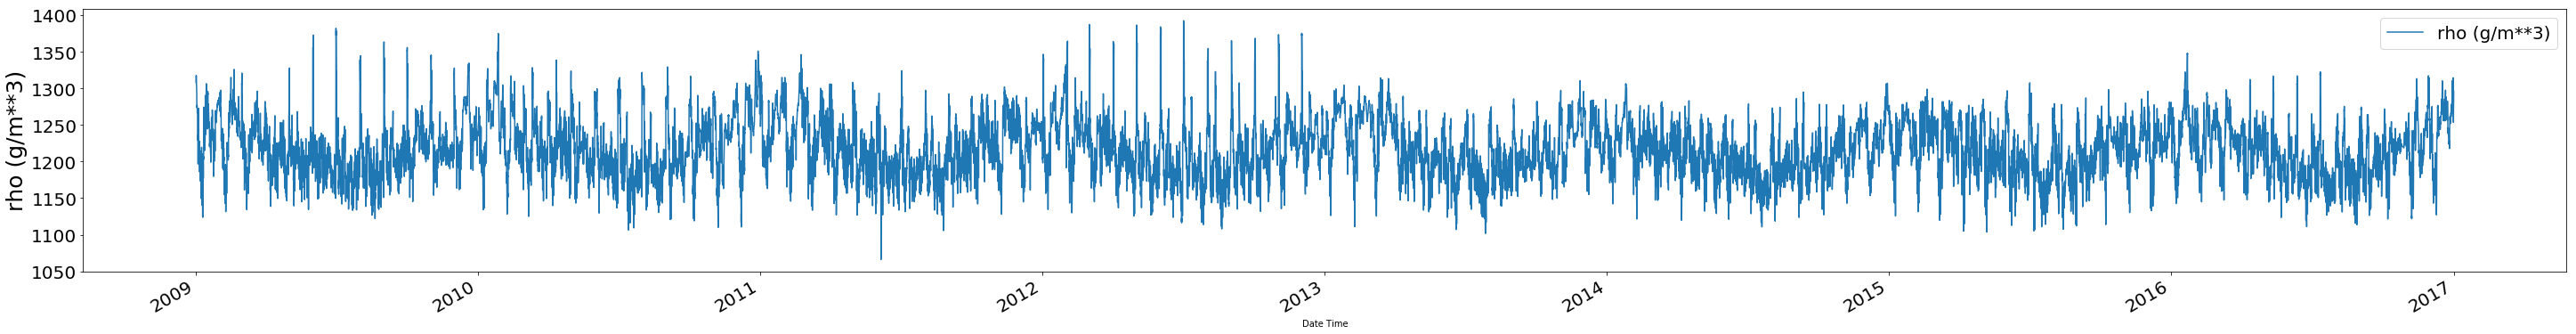

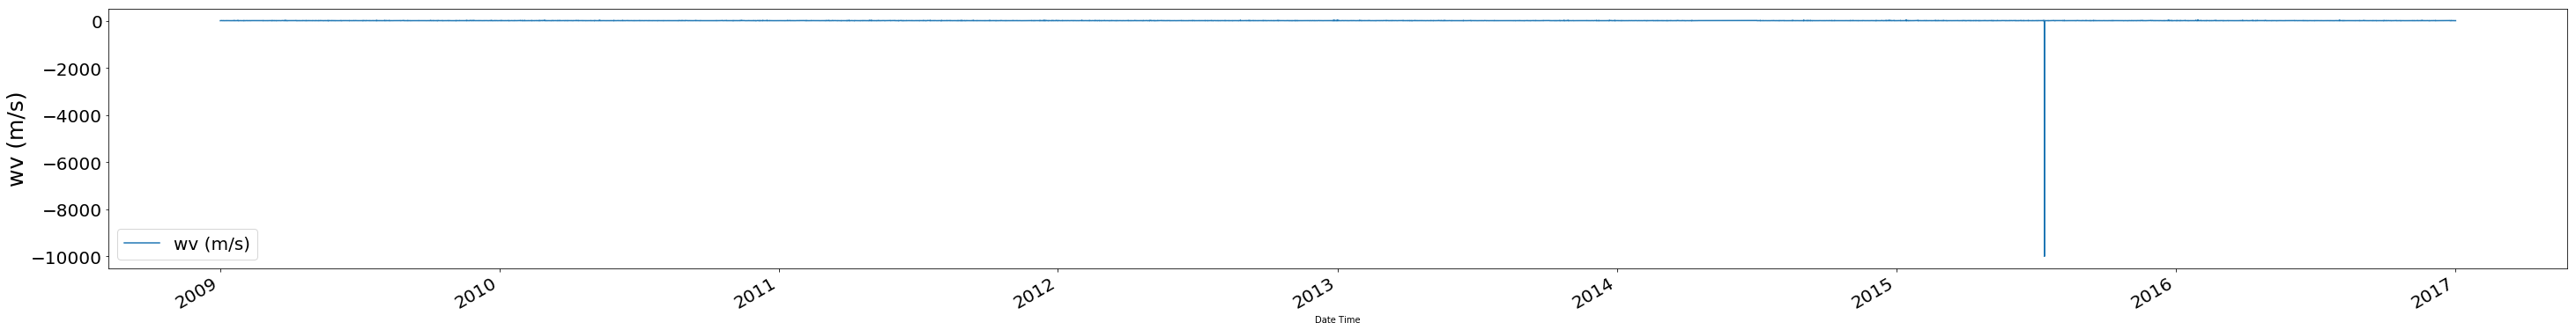

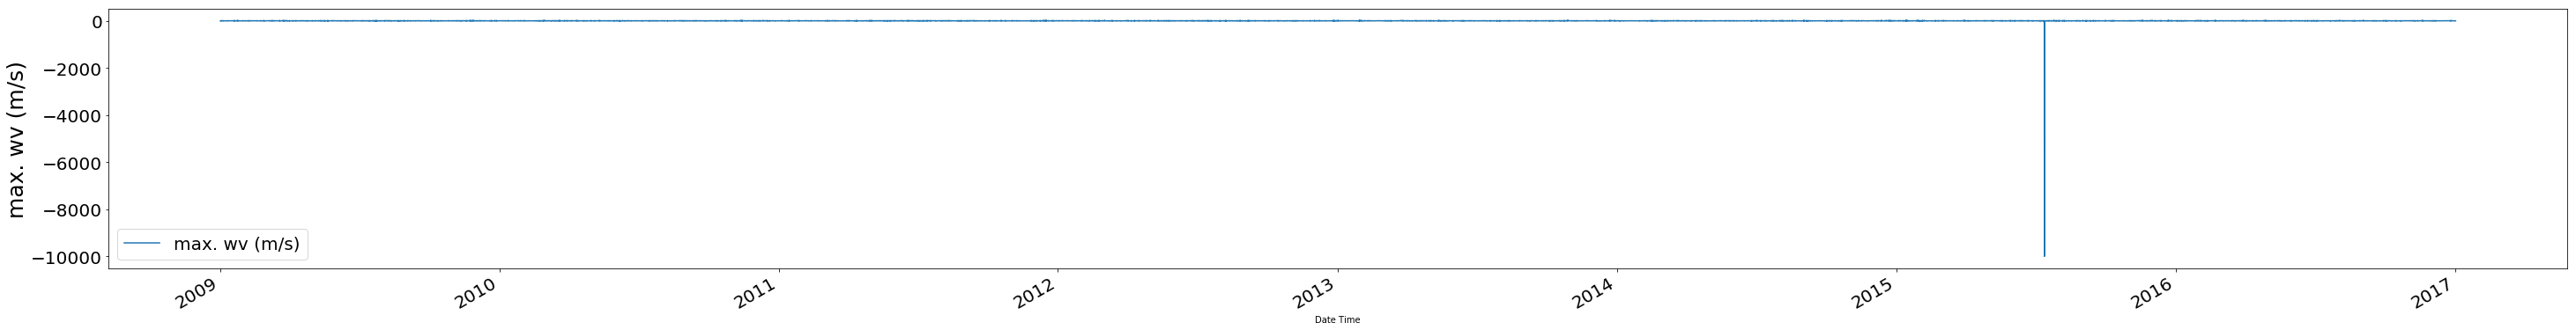

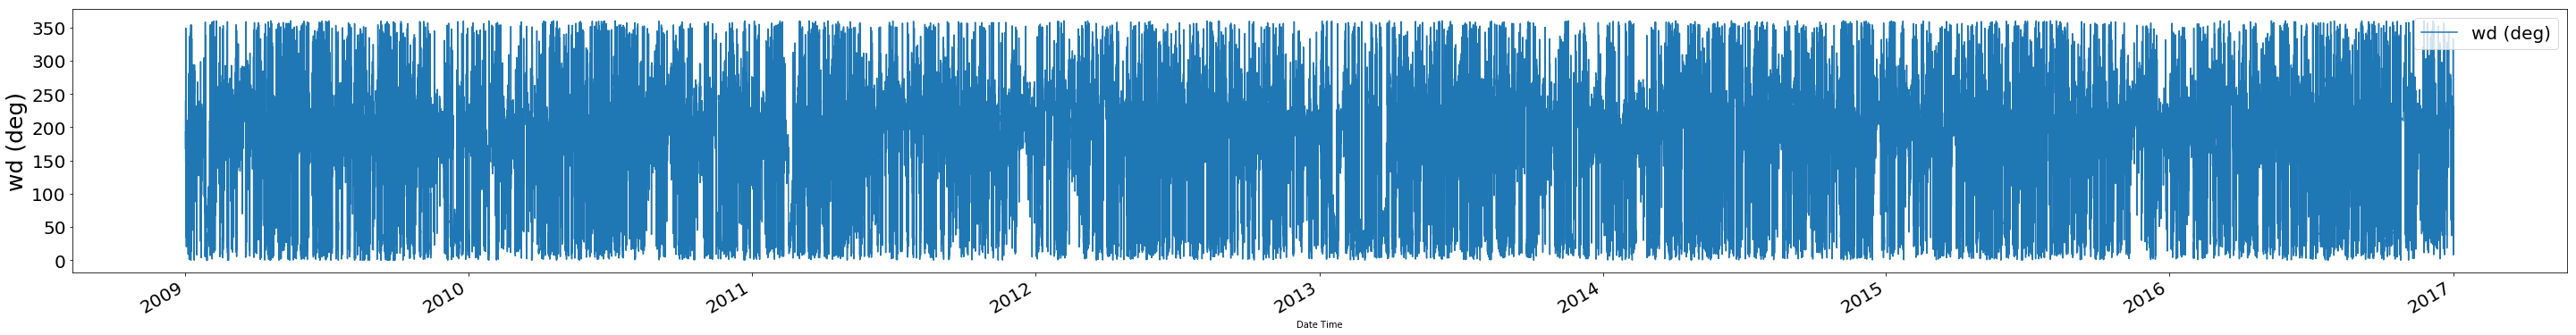

In [117]:

for i,col in enumerate(edaDf.columns):
    plt.figure(figsize=(50,100))
    plt.subplot(14,1,i+1)
    edaDf[col].plot(fontsize=20)
    plt.legend(fontsize=20)
    plt.ylabel(col, fontsize=25)
    plt.show()

## Load dataset for Prediction

In [4]:
df = pd.read_csv("./data/climate_hour.csv")

In [5]:
df["Date Time"]= df["Date Time"].map(lambda x: str(x).replace(" ","_"))
df.head(3)

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009_01:00:00,996.50,-8.05,265.38,-8.78,94.4,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
1,01.01.2009_02:00:00,996.62,-8.88,264.54,-9.77,93.2,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
2,01.01.2009_03:00:00,996.84,-8.81,264.59,-9.66,93.5,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2


## Convert the time column to Pandas  Datetime format

In [6]:
#dt = pd.to_datetime(df["Date Time"])
#df["Date Time"] = dt

## Split the Train and Test Data

In [7]:
x_train_last_index =df.index[df["Date Time"] == "31.12.2014_22:00:00"][0]
x_train = df.loc[:x_train_last_index]
display(x_train.head(3))
display(x_train.tail(3))

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009_01:00:00,996.50,-8.05,265.38,-8.78,94.4,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
1,01.01.2009_02:00:00,996.62,-8.88,264.54,-9.77,93.2,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
2,01.01.2009_03:00:00,996.84,-8.81,264.59,-9.66,93.5,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2


,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
52562,31.12.2014_20:00:00,1006.28,2.14,274.81,1.89,98.2,7.13,7.00,0.13,4.34,6.96,1269.97,0.68,1.68,119.3
52563,31.12.2014_21:00:00,1006.69,1.96,274.60,1.72,98.3,7.04,6.92,0.12,4.29,6.87,1271.36,0.67,1.56,145.3
52564,31.12.2014_22:00:00,1006.92,1.94,274.56,1.75,98.6,7.03,6.93,0.10,4.29,6.88,1271.74,0.71,1.80,129.6


In [8]:
x_test_start_index =df.index[df["Date Time"] == "31.12.2014_00:00:00"][0]
x_test= df.loc[x_test_start_index:]
x_test=x_test.iloc[:-1]
display(x_test.head(3))
display(x_test.tail(3))

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
52542,31.12.2014_00:00:00,1004.60,1.53,274.33,0.08,90.0,6.82,6.14,0.68,3.81,6.11,1271.08,2.12,3.47,260.7
52543,31.12.2014_01:00:00,1004.32,1.43,274.25,-0.39,87.6,6.78,5.94,0.84,3.68,5.91,1271.29,2.89,4.11,251.3
52544,31.12.2014_02:00:00,1004.26,1.59,274.41,-0.52,85.8,6.85,5.88,0.97,3.65,5.85,1270.51,2.93,4.37,257.0


,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
70033,31.12.2016_21:00:00,1001.29,-3.09,269.98,-7.09,73.7,4.86,3.58,1.28,2.23,3.58,1289.78,0.61,1.48,207.50
70034,31.12.2016_22:00:00,1000.70,-2.59,270.51,-7.04,71.3,5.04,3.60,1.45,2.24,3.59,1286.67,0.38,0.72,8.15
70035,31.12.2016_23:00:00,1000.21,-3.76,269.39,-7.95,72.5,4.62,3.35,1.27,2.09,3.35,1291.71,0.89,1.30,223.70


## Turn dataframe to array

In [9]:
timestep = 24

arr_train = np.array(x_train.iloc[:,1:])
arr_test = np.array(x_test.iloc[:,1:])

In [10]:
timestep=24
reshape_length = timestep * arr_train.shape[1]
lst=[]
for i in range(arr_train.shape[0]-timestep+1):
    arr=arr_train[i:i+timestep]
    lst.append(arr.reshape(reshape_length))
arr_train=np.array(lst)
print(arr_train.shape)
display(arr_train[:3])
display(arr_train[-3:])

(52542, 336)


array([[ 9.9650e+02, -8.0500e+00,  2.6538e+02, ...,  4.1000e-01,
         8.8000e-01,  1.5500e+02],
       [ 9.9662e+02, -8.8800e+00,  2.6454e+02, ...,  2.8000e-01,
         1.0000e+00,  1.4810e+02],
       [ 9.9684e+02, -8.8100e+00,  2.6459e+02, ...,  4.9000e-01,
         8.8000e-01,  2.0980e+02]])

array([[1.00446e+03, 1.53000e+00, 2.74340e+02, ..., 6.80000e-01,
        1.68000e+00, 1.19300e+02],
       [1.00423e+03, 1.46000e+00, 2.74290e+02, ..., 6.70000e-01,
        1.56000e+00, 1.45300e+02],
       [1.00440e+03, 1.47000e+00, 2.74280e+02, ..., 7.10000e-01,
        1.80000e+00, 1.29600e+02]])

In [11]:
timestep=24
reshape_length = timestep * arr_test.shape[1]
lst=[]
for i in range(arr_test.shape[0]-timestep+1):
    arr=arr_test[i:i+timestep]
    lst.append(arr.reshape(reshape_length))
arr_test=np.array(lst)
print(arr_test.shape)
display(arr_test[:3])
display(arr_test[-3:])

(17471, 336)


array([[1.00460e+03, 1.53000e+00, 2.74330e+02, ..., 3.50000e-01,
        8.60000e-01, 1.40800e+02],
       [1.00432e+03, 1.43000e+00, 2.74250e+02, ..., 4.10000e-01,
        9.20000e-01, 2.73800e+02],
       [1.00426e+03, 1.59000e+00, 2.74410e+02, ..., 4.30000e-01,
        8.80000e-01, 1.19100e+02]])

array([[ 1.00893e+03, -2.63000e+00,  2.69840e+02, ...,  6.10000e-01,
         1.48000e+00,  2.07500e+02],
       [ 1.00882e+03, -2.98000e+00,  2.69500e+02, ...,  3.80000e-01,
         7.20000e-01,  8.15000e+00],
       [ 1.00867e+03, -4.09000e+00,  2.68410e+02, ...,  8.90000e-01,
         1.30000e+00,  2.23700e+02]])

## Transform Class Labels to Time Series format

In [12]:
timestep=24
y_train = np.array(df.iloc[timestep: timestep + arr_train.shape[0]]["T (degC)"])
#y_train = y_train.reshape(y_train.shape[0],1)
display(y_train.shape)
display(y_train[:3])
display(y_train[-3:])

(52542,)

array([-4.44, -4.29, -4.45])

array([1.96, 1.94, 2.18])

In [13]:
x_test_start_index =df.index[df["Date Time"] == "31.12.2014_00:00:00"][0]
y_test= df.loc[x_test_start_index+timestep:]["T (degC)"]

display(y_test.shape)
display(y_test[:3])
display(y_test[-3:])

(17471,)

52566    2.06
52567    2.22
52568    2.04
Name: T (degC), dtype: float64

70034   -2.59
70035   -3.76
70036   -4.82
Name: T (degC), dtype: float64

## Normalization

In [14]:
df2=df.copy()
for i, colName in enumerate(df2.columns[1:]):
    df2[colName] = (df2[colName] - np.min(df2[colName])) /  (np.max(df2[colName]) - np.min(df2[colName]))
print(df2.shape)
df2.head(3)

(70037, 15)


,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009_01:00:00,0.805868,0.245003,0.240722,0.335568,0.935588,0.037580,0.085567,0.004130,0.083190,0.084416,0.740479,0.998764,0.998034,0.535278
1,01.01.2009_02:00:00,0.807108,0.231179,0.226806,0.314830,0.921785,0.034236,0.076754,0.004564,0.074584,0.075758,0.753930,0.998768,0.998034,0.528611
2,01.01.2009_03:00:00,0.809381,0.232345,0.227634,0.317134,0.925236,0.034395,0.077855,0.004347,0.075731,0.076840,0.753715,0.998761,0.998034,0.464444


In [15]:
x_train_last_index =df2.index[df2["Date Time"] == "31.12.2014_22:00:00"][0]
x_train = df2.loc[:x_train_last_index]


x_test_start_index =df2.index[df2["Date Time"] == "31.12.2014_00:00:00"][0]
x_test= df2.loc[x_test_start_index:]
x_test=x_test.iloc[:-1]


In [16]:
timestep = 24

arr_train = np.array(x_train.iloc[:,1:])
arr_test = np.array(x_test.iloc[:,1:])

In [17]:
timestep=24
reshape_length = timestep * arr_train.shape[1]
lst=[]
for i in range(arr_train.shape[0]-timestep+1):
    arr=arr_train[i:i+timestep]
    lst.append(arr.reshape(reshape_length))
arr_train=np.array(lst)
print(arr_train.shape)
display(arr_train[:3])
display(arr_train[-3:])

(52542, 336)


array([[0.80586837, 0.24500333, 0.24072233, ..., 0.99878441, 0.99805875,
        0.43055556],
       [0.80710817, 0.23117921, 0.22680583, ..., 0.99877142, 0.99807073,
        0.41138889],
       [0.80938113, 0.2323451 , 0.22763419, ..., 0.9987924 , 0.99805875,
        0.58277778]])

array([[0.88810828, 0.40456362, 0.38916501, ..., 0.99881138, 0.9981386 ,
        0.33138889],
       [0.885732  , 0.40339773, 0.38833665, ..., 0.99881038, 0.99812662,
        0.40361111],
       [0.88748838, 0.40356429, 0.38817097, ..., 0.99881437, 0.99815057,
        0.36      ]])

In [18]:
timestep=24
reshape_length = timestep * arr_test.shape[1]
lst=[]
for i in range(arr_test.shape[0]-timestep+1):
    arr=arr_test[i:i+timestep]
    lst.append(arr.reshape(reshape_length))
arr_test=np.array(lst)
print(arr_test.shape)
display(arr_test[:3])
display(arr_test[-3:])

(17471, 336)


array([[0.88955471, 0.40456362, 0.38899934, ..., 0.99877841, 0.99805676,
        0.39111111],
       [0.88666185, 0.40289807, 0.38767396, ..., 0.99878441, 0.99806274,
        0.76055556],
       [0.88604195, 0.40556296, 0.39032472, ..., 0.99878641, 0.99805875,
        0.33083333]])

array([[0.93429073, 0.33527648, 0.31461233, ..., 0.99880438, 0.99811864,
        0.57638889],
       [0.93315425, 0.32944704, 0.30897946, ..., 0.99878141, 0.99804278,
        0.02263889],
       [0.9316045 , 0.31095936, 0.29092114, ..., 0.99883235, 0.99810067,
        0.62138889]])

## Time series format

In [19]:
n_feature=14
timestep = 24
arr_train= np.reshape(arr_train, (arr_train.shape[0],timestep, n_feature))
arr_test= np.reshape(arr_test, (arr_test.shape[0],timestep, n_feature))
print(arr_train.shape, y_train.shape)
print(arr_test.shape, y_test.shape)

(52542, 24, 14) (52542,)
(17471, 24, 14) (17471,)


## LSTM Modeling

In [32]:
import keras #Need to downgrade keras to 2.1.2 Version (pip install kera)
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Embedding
from keras.layers import LSTM
from keras.layers import BatchNormalization
from keras.callbacks import EarlyStopping, ModelCheckpoint


In [ ]:
#Design network
model = Sequential()
model.add(LSTM(32,input_shape = (timestep, n_feature),return_sequences=True))
model.add(LSTM(32))
#model.add(Dropout(0.5))
#model.add(BatchNormalization())
#model.add(Dense(1))
#model.add(Dense(8, kernel_initializer="normal", activation="linear"))
model.add(Dense(1))

#To save the best model by monitor the "Validation Loss"
checkpoint = ModelCheckpoint(filepath="./model/best_mod.h5", 
                             monitor='val_loss',
                             verbose=1, 
                             save_best_only=True, 
                             mode='min')
callbacks_list = [checkpoint]

model.compile(loss="mae", optimizer="adam")

batch_size = 200
no_epoch=500
step_per_epoch = arr_train.shape[0]//batch_size

#fit network
history = model.fit(arr_train, y_train, 
                    epochs=no_epoch, 
                    batch_size=batch_size,
                    #steps_per_epoch = step_per_epoch,
                    validation_data=(arr_test,y_test),
                   callbacks=callbacks_list)
#Save models in disk
model.save("./model/model_EP%s_b.h5"%(no_epoch))


#Save Model History (Loss vs Epoch)
epochs= np.linspace(1,no_epoch,no_epoch,dtype=int)
pd.DataFrame(list(zip(epochs,history.history["loss"],history.history["val_loss"])), \
             columns=["epoch", "loss","val_loss"]).to_csv("./model/history_EP500", )

Train on 52542 samples, validate on 17471 samples
Epoch 1/500
52542/52542 [==============================] - 19s 357us/step - loss: 5.2727 - val_loss: 3.1880

Epoch 00001: val_loss improved from inf to 3.18797, saving model to ./model/best_mod.h5
Epoch 2/500
52542/52542 [==============================] - 17s 314us/step - loss: 2.0474 - val_loss: 1.5867

Epoch 00002: val_loss improved from 3.18797 to 1.58668, saving model to ./model/best_mod.h5
Epoch 3/500
52542/52542 [==============================] - 17s 323us/step - loss: 1.1679 - val_loss: 1.0265

Epoch 00003: val_loss improved from 1.58668 to 1.02647, saving model to ./model/best_mod.h5
Epoch 4/500
52542/52542 [==============================] - 16s 305us/step - loss: 0.8367 - val_loss: 0.7930

Epoch 00004: val_loss improved from 1.02647 to 0.79304, saving model to ./model/best_mod.h5
Epoch 5/500
52542/52542 [==============================] - 16s 305us/step - loss: 0.6906 - val_loss: 0.6661

Epoch 00005: val_loss improved from 0.793

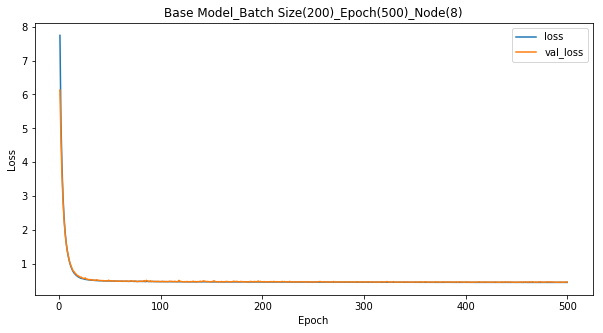

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
hist = pd.read_csv("./model_base_BS200_EP500_node8/history_EP500")
plt.figure(figsize=(10,5))
plt.plot("epoch","loss", data=hist)
plt.plot("epoch","val_loss", data=hist)
plt.title("Base Model_Batch Size(200)_Epoch(500)_Node(8)")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

## Retrieve saved model

In [20]:
batch_size=10
model = keras.models.load_model('./model_base_BS200_EP500_node8/best_mod.h5')
train_score = model.evaluate(arr_train, y_train, batch_size=batch_size*2, verbose=1)
test_score = model.evaluate(arr_test, y_test, batch_size=batch_size*2, verbose=1)
print("Train score:%0.3f, Test Score:%0.3f"%(train_score, test_score))
pred_temp=model.predict(arr_test)

17471/17471 [==============================] - 9s 506us/step
Train score:0.454, Test Score:0.464


In [63]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#print(pred_temp.shape)
pred_temp = pred_temp.flatten()

#x_test_start_index =df2.index[df2["Date Time"] == "31.12.2014_00:00:00"][0]
#date_time= df2.loc[x_test_start_index+timestep:]["Date Time"]

x_test_start_index =df2.index[df2["Date Time"] == "31.12.2014_00:00:00"][0]
date_time= df2.loc[x_test_start_index+timestep:]["Date Time"]

date_time=list(pd.to_datetime(list(map(lambda x:x.replace("_"," "), date_time))))
df=pd.DataFrame(list(zip(date_time,y_test,pred_temp)), columns=["date_time", "y_test","pred_temp"])
df.set_index("date_time", inplace=True)
#df=df.cumsum()
#plt.plot()
#plt.plot(pred_temp, data=df)
#plt.show()

np.min(df.y_test)

-13.67

<Figure size 1440x1440 with 0 Axes>

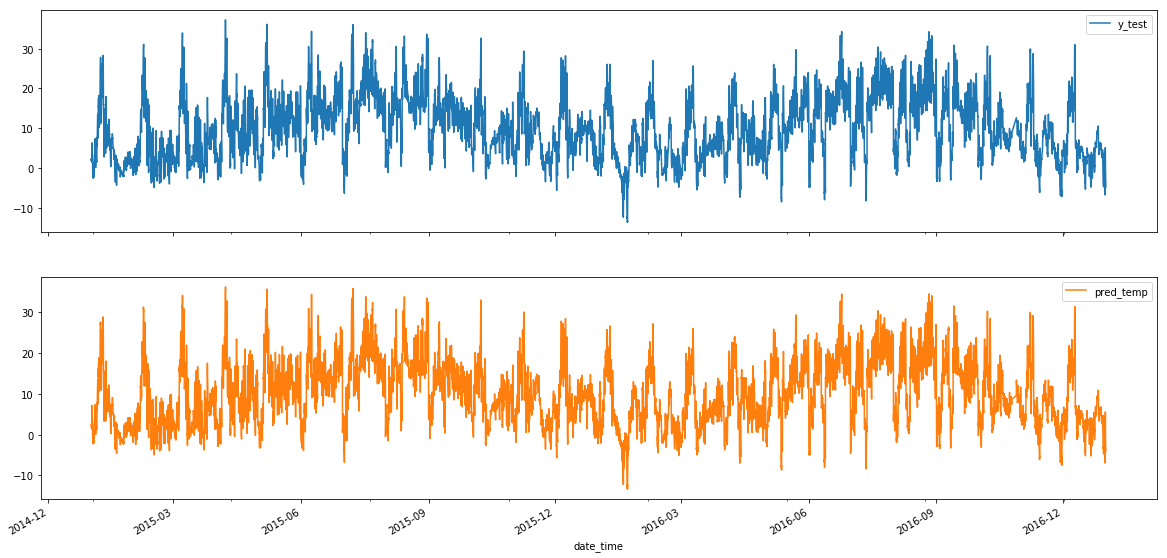

In [84]:
plt.figure(figsize=(20,20))
df.plot(figsize=(20,10),subplots=True, fontsize=10)
#plt.plot(y_test, data=df)
#plt.plot(pred_temp, data=df)
plt.show()

## Print to Kaggle submission

In [ ]:
#print(pred_temp.shape)
pred_temp = pred_temp.flatten()

x_test_start_index =df2.index[df2["Date Time"] == "31.12.2014_00:00:00"][0]
date_time= df2.loc[x_test_start_index+timestep:]["Date Time"]


pred_df = pd.DataFrame(list(zip(date_time,pred_temp)), columns= ["date_time", "temperature"])
pred_df.to_csv("./submission/submit3.csv", index=False)

In [ ]:
date_time

In [82]:
pd.read_csv("./submission/submit2.csv" ).head(3)

,date_time,temperature
0,01.01.2015_00:00:00,2.434895
1,01.01.2015_01:00:00,2.087303
2,01.01.2015_02:00:00,2.446273
